## Step 1: Find a Story

The movement of goods via water has been essential for trade since the dawn of civilization. However, with the technological advancements of the late 20th century, is waterborne commerce still as vital? We will explore this idea by looking at domestic tonnage of goods moved by water in the US from 1974 to 2012. We will also explore total tonnage of foreign goods entering US ports during the same time period.

## Step 2: Remember your Audience

The intended audience for this story would be a novice or genaralist interested the waterborne movement of commericial goods into and within the United States.

## Step 3: Find Data

Data sets were downloaded from www.data.gov, then uploaded to the student repositories on the Univeristy of Missouri DSA servers. We will import them into two dataframes to work with in this R environment.

In [187]:
domestic <- read.csv('../../../datasets/domestic_waterborne_commerce.csv')
foreign <- read.csv('../../../datasets/total_waterborne_commerce.csv')

## Step 4: Vet Data Sources

These data were published by the US Army Corps of Engineers on June 10, 2014 and can be found here: https://catalog.data.gov/dataset/total-tonnage-of-commodites-carried-on-commercial-waterways-by-traffic-type; https://catalog.data.gov/dataset/total-tonnage-foreign-and-domestic-of-commodites-carried-on-commercial-waterways

## Step 5: Filter Results

Here we will explore the dataframes.

In [188]:
head(domestic)
tail(domestic)
str(domestic)

head(foreign)
tail(foreign)
str(foreign)

Year,Total,Coastwise,Lakewise,Internal,Intraport,Intra.territory
1974,982699639,233358124,146067270,511021978,88197576,4054691
1975,946326959,231932437,129331161,503932258,78279224,2851879
1976,979042910,236278624,132112775,523972573,83731092,2947846
1977,972966806,248083336,109079945,528704658,83444472,3654395
1978,1075291865,305342824,142662552,534508943,89506584,3270962
1979,1080312665,304665522,143563644,534969167,93113665,4000667


,Year,Total,Coastwise,Lakewise,Internal,Intraport,Intra.territory
34,2007,1021519349,205760293,95639914,621897739,93073306,5148097
35,2008,956335225,186289563,90402327,588479945,86946214,4217206
36,2009,857084650,167742096,63215628,522491855,98984346,4650725
37,2010,893461204,164456653,80543254,565558842,78259538,4642917
38,2011,887930255,160962326,87908342,553589091,81286175,4184321
39,2012,884915432,152157837,84405845,565047347,81034809,2269594


'data.frame':	39 obs. of  7 variables:
 $ Year           : int  1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 ...
 $ Total          : int  982699639 946326959 979042910 972966806 1075291865 1080312665 1077483402 1054456797 957009596 956520817 ...
 $ Coastwise      : int  233358124 231932437 236278624 248083336 305342824 304665522 329608613 321989988 311058264 309636759 ...
 $ Lakewise       : int  146067270 129331161 132112775 109079945 142662552 143563644 115124231 115418165 72084986 83446847 ...
 $ Internal       : int  511021978 503932258 523972573 528704658 534508943 534969167 534979027 520668720 495453486 487132248 ...
 $ Intraport      : int  88197576 78279224 83731092 83444472 89506584 93113665 94183696 93249873 75601691 73144961 ...
 $ Intra.territory: int  4054691 2851879 2947846 3654395 3270962 4000667 3587835 3130051 2811169 3160002 ...


Year,Total,Foreign,Domestic
1974,1746788544,764088905,982699639
1975,1695034366,748707407,946326959
1976,1835006819,855963909,979042910
1977,1908223619,935256813,972966806
1978,2021349754,946057889,1075291865
1979,2073757628,993444963,1080312665


,Year,Total,Foreign,Domestic
35,2008,2477094228,1520758974,956335255
36,2009,2210751710,1353667060,857084650
37,2010,2334398600,1440937396,893461204
38,2011,2367483603,1479553348,887930255
39,2012,2306810362,1421894930,884915432
40,2013,2274777616,1383625910,891151706


'data.frame':	40 obs. of  4 variables:
 $ Year    : int  1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 ...
 $ Total   : num  1.75e+09 1.70e+09 1.84e+09 1.91e+09 2.02e+09 ...
 $ Foreign : int  764088905 748707407 855963909 935256813 946057889 993444963 921404000 887102150 819730983 751140194 ...
 $ Domestic: int  982699639 946326959 979042910 972966806 1075291865 1080312665 1077483402 1054456797 957009596 956520817 ...


The domestic dataframe shows total tonnage of domestic goods moved within the US via waterway per year, as well as a breakdown of different manners in which the goods were moved. The foreign dataframe gives total tonnage of foreign goods moved into the US via waterways per year, as well as total movement of domestic goods, and a overall tally for both.

We will convert the tonnage figures to "per million" for the domestic dataframe.

In [138]:
library(dplyr)

domestic$TotalPM <- domestic$Total/1000000
domestic$CoastwisePM <- domestic$Coastwise/1000000
domestic$LakewisePM <- domestic$Lakewise/1000000
domestic$InternalPM <- domestic$Internal/1000000
domestic$IntraportPM <- domestic$Intraport/1000000
domestic$Intra.territoryPM <- domestic$Intra.territory/1000000

domestic2 <- select(domestic, Year, TotalPM, CoastwisePM, LakewisePM, InternalPM, IntraportPM, Intra.territoryPM)

head(domestic2)

Year,TotalPM,CoastwisePM,LakewisePM,InternalPM,IntraportPM,Intra.territoryPM
1974,982.6996,233.3581,146.0673,511.0220,88.19758,4.054691
1975,946.3270,231.9324,129.3312,503.9323,78.27922,2.851879
1976,979.0429,236.2786,132.1128,523.9726,83.73109,2.947846
1977,972.9668,248.0833,109.0799,528.7047,83.44447,3.654395
1978,1075.2919,305.3428,142.6626,534.5089,89.50658,3.270962
1979,1080.3127,304.6655,143.5636,534.9692,93.11366,4.000667


We will limit the foreign dataframe to only foreign tonnage of goods moved into the U.S. for each year, per million.

In [189]:
foreign$ForeignPM <- foreign$Foreign/1000000

foreign2 <- select(foreign, Year, ForeignPM)
foreign2 <- foreign2[-c(40), ]

tail(foreign2)

,Year,ForeignPM
34,2007,1542.452
35,2008,1520.759
36,2009,1353.667
37,2010,1440.937
38,2011,1479.553
39,2012,1421.895


## Step 6: Visuals 

We will graph the change of movement of goods for each domestic type over time. Then we will graph the change of total domestic movement of goods, then fit a regression line to the graph to visualize the trend in change.

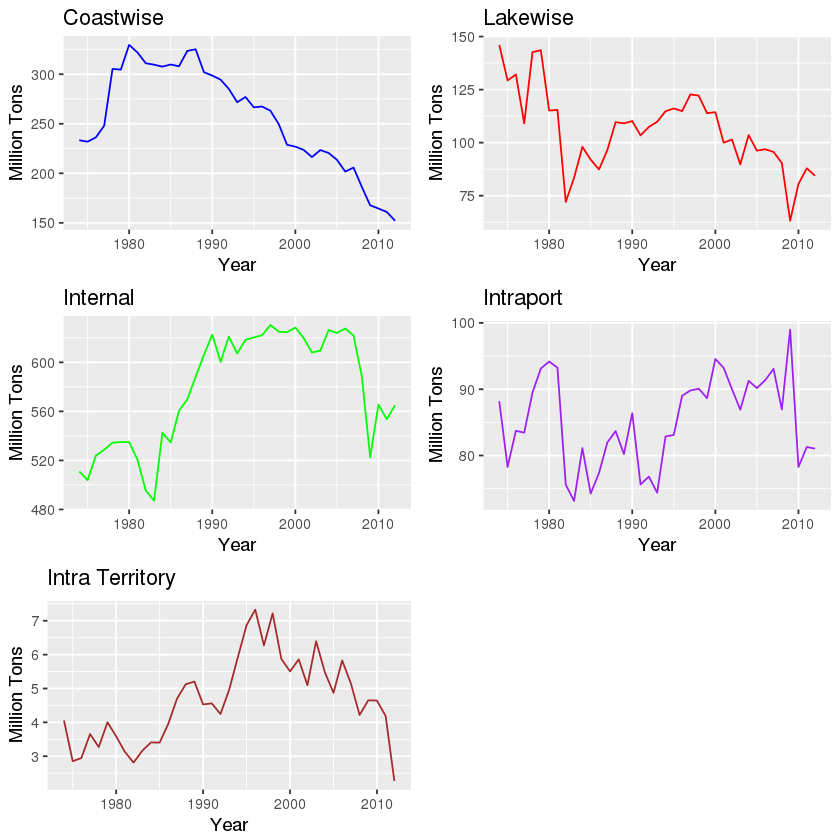

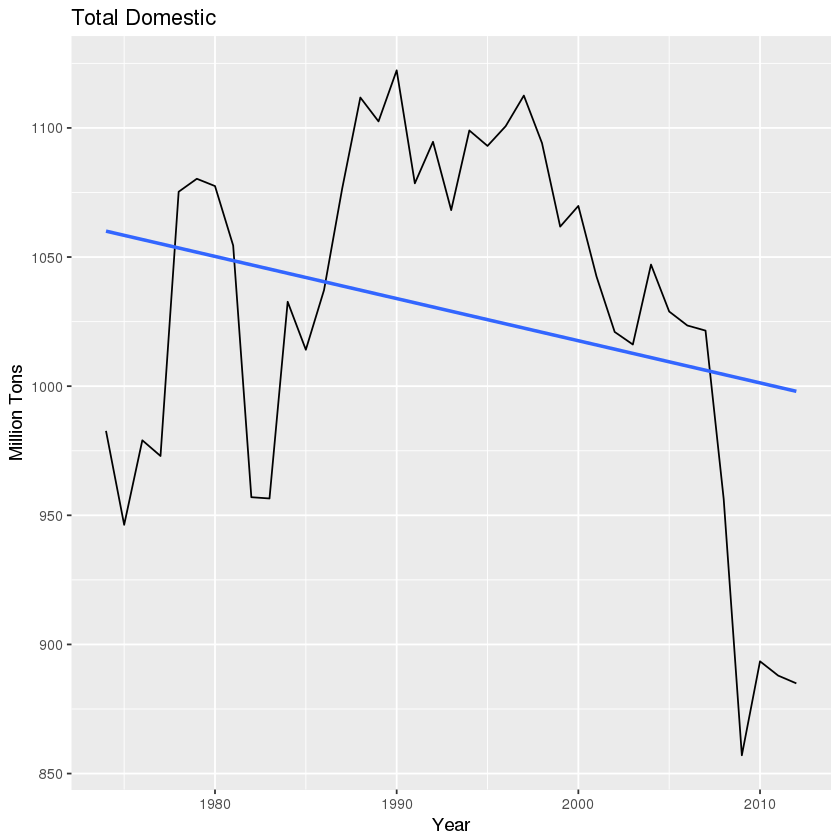

In [191]:
library(ggplot2)
library(gridExtra)

grid.arrange(
    ggplot(domestic2, aes(x= Year, y = CoastwisePM))+geom_line(color = "blue")+labs(title="Coastwise",y="Million Tons"),
    ggplot(domestic2, aes(x= Year, y = LakewisePM))+geom_line(color = "red")+labs(title="Lakewise",y="Million Tons"),
    ggplot(domestic2, aes(x= Year, y = InternalPM))+geom_line(color = "green")+labs(title="Internal",y="Million Tons"),
    ggplot(domestic2, aes(x= Year, y = IntraportPM))+geom_line(color = "purple")+labs(title="Intraport",y="Million Tons"),
    ggplot(domestic2, aes(x= Year, y = Intra.territoryPM))+geom_line(color = "brown")+labs(title="Intra Territory",y="Million Tons"),
    ncol=2)

plot_domestic <- ggplot(domestic2, aes(x=Year, y = TotalPM))+ geom_line() + geom_smooth(method = lm, se = FALSE)+
    labs(title="Total Domestic",y="Million Tons")

plot_domestic

Now we will graph the change in foreign goods entering the US and fit a regression line to visualize the trend in change.

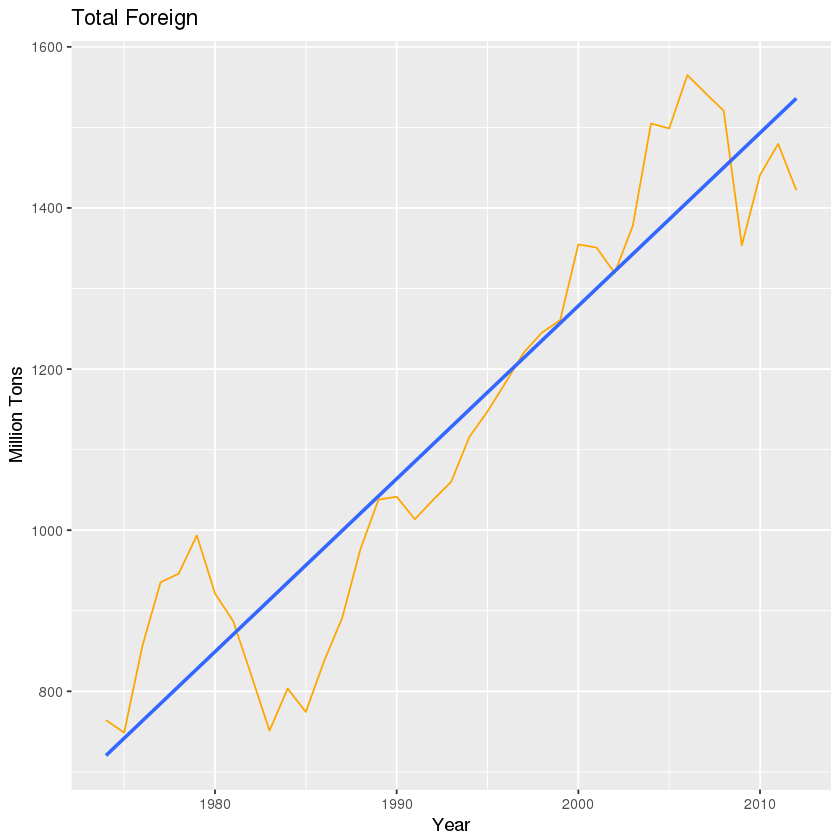

In [192]:
plot_foreign <- ggplot(foreign2, aes(x=Year, y=ForeignPM))+geom_line(color='orange')+
    geom_smooth(method = lm, se = FALSE)+
    labs(title="Total Foreign",y="Million Tons")
plot_foreign

## Conclusion: Tell the Story

The data show that overall domestic movement of goods via commercial waterways per tonnage has been decreasing in the US from 1974 to 2012. There are various spikes and drops over the years which are not necessary observed across all traffic types.

The data also show that importing of foriegn goods via commerical waterways per tonnage has been increasing in the US over the same time period. 

A spike in movement prior to 1980 is reflected in both domestic and foreign goods, as is a drop in the early 1980s. A heavy drop in domestic commodity movement in the late 2000s is also seen in foreign commodities, but not to such an extreme degree.

The increasing rate at which foreign goods are coming into US ports is greater than the decreasing rate at which domestic goods are moving between US ports. This tells us that the US is relying less on waterborne movement of domestic goods today than in the past, while relying more on the waterborne movement of foreign goods today than previously. 